# Step-by-Step Guide to Principal Component Analysis (PCA)

### 1. Data Collection
- **Goal**: Collect the dataset that contains the features (variables) that you want to analyze with PCA.
- Ensure that the data is in the correct format (e.g., tabular form with features as columns and samples as rows).

---

### 2. Data Preprocessing
- **Handle Missing Values**: Ensure there are no missing values in the data.
    - You can either remove rows with missing values or impute missing values.
  
- **Standardize the Data**: 
    - PCA is sensitive to the scale of the variables, so it is important to standardize the data. 
    - Standardization scales the features such that they have a mean of 0 and a variance of 1.

    ```python
    from sklearn.preprocessing import StandardScaler

    # Assuming df is your DataFrame with numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    ```

---

### 3. Covariance Matrix Computation
- **Goal**: Compute the covariance matrix to understand how the variables in the dataset relate to one another.

    - The covariance matrix shows the covariance (linear relationship) between the variables.
    - The formula for covariance between two variables \(X\) and \(Y\) is:
    
      $Cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$
      

    You can compute the covariance matrix manually or let the PCA implementation handle it automatically.

---

### 4. Eigenvalues and Eigenvectors Computation
- **Goal**: Compute the **eigenvalues** and **eigenvectors** of the covariance matrix.
    - **Eigenvalues**: These tell you the amount of variance captured by each principal component.
    - **Eigenvectors**: These represent the direction of the principal components.

    - Eigenvalues are used to rank the principal components by importance, while eigenvectors define the direction of these components.

---

### 5. Selecting the Principal Components
- **Goal**: Select the principal components that capture the most variance in the data.
    - The principal components are ordered by the amount of variance they capture (based on the eigenvalues).
    - You can plot the **explained variance ratio** to decide how many components to keep.
    
    - You can use a **Scree Plot** or the **Cumulative Explained Variance Plot** to visualize this.
    
    ```python
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    # Fit PCA
    pca = PCA()
    pca_data = pca.fit_transform(scaled_data)
    
    # Plot cumulative explained variance
    explained_variance = pca.explained_variance_ratio_.cumsum()
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Principal Components')
    plt.show()
    ```

---

### 6. Project Data onto Principal Components
- **Goal**: Project the original data onto the selected principal components to create a lower-dimensional representation.
    - Once you select the top \(k\) components that capture most of the variance, project the original data onto this lower-dimensional space.

    ```python
    # Project the original data onto the first 2 principal components
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)
    
    # Convert to DataFrame for easier visualization
    pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
    ```

---

### 7. Visualize the Principal Components
- **Goal**: Plot the data in the new lower-dimensional space to visualize patterns, clusters, or trends.

    ```python
    import seaborn as sns
    
    # Scatter plot of the first two principal components
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)
    plt.title('PCA Scatter Plot')
    plt.show()
    ```

---

### 8. Interpret the Results
- **Goal**: Interpret the loadings of the original variables on the principal components.
    - **Loadings**: The coefficients (weights) of the original variables in the principal components help explain what the principal components represent.

    ```python
    # Loadings (contributions of each variable to the principal components)
    loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=['PC1', 'PC2'])
    print(loadings)
    ```

- **Important Notes**:
    - The **first principal component (PC1)** captures the most variance.
    - The **second principal component (PC2)** is orthogonal to PC1 and captures the second most variance.

---

### 9. Use PCA for Further Analysis
- **Dimensionality Reduction**: Use the lower-dimensional data for tasks like clustering, visualization, or feeding into a machine learning model.
- **Feature Selection**: Use PCA to select the most important features for predictive modeling.


# Situations Where PCA is Not Applicable

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction, but there are several cases where it might not be suitable or effective:

## 1. Non-linear Data Structures
- **Issue**: PCA is a linear dimensionality reduction technique, which assumes that data can be reduced via linear transformations. For non-linear relationships in the data (e.g., "Swiss Roll" or "Two Moons"), PCA won’t capture the structure well.
- **Alternative**: Use techniques like **t-SNE**, **Isomap**, or **Kernel PCA** for non-linear data.

## 2. Data with Low or Similar Variance
- **Issue**: PCA finds directions (principal components) that capture the most variance. If the data has low variance, or all features have similar variance, PCA might not be useful.
- **Example**: Datasets where most features are constant or uniformly distributed.
- **Alternative**: Use **LDA** or other dimensionality reduction techniques that consider class separability.

## 3. Categorical Data
- **Issue**: PCA is designed for numerical data. It does not directly work with categorical features.
- **Alternative**: Convert categorical data using **One-Hot Encoding**, or use **Multiple Correspondence Analysis (MCA)**.

## 4. Data That is Already Low Dimensional
- **Issue**: If the dataset already has a small number of features (e.g., 2 or 3), PCA may not provide significant benefits.
- **Alternative**: PCA may not be necessary; focus on clustering, regression, or other methods.

## 5. Presence of Noise
- **Issue**: PCA can be sensitive to noise, as it tries to capture the maximum variance, which may include noise.
- **Alternative**: Use **Robust PCA**, or clean the data before applying PCA.

## 6. Highly Correlated Features
- **Issue**: When features are highly correlated, PCA might assign most of the variance to the first principal component, ignoring others.
- **Alternative**: Use **Independent Component Analysis (ICA)** for better performance in such cases.

## 7. Lack of Interpretability
- **Issue**: PCA transforms features into combinations of principal components, which may not be easily interpretable.
- **Alternative**: Use methods that preserve feature interpretability like **LDA** or manual feature selection.

## 8. Scaling Issues
- **Issue**: PCA is sensitive to the scale of features. Features with larger scales will dominate the PCA results.
- **Solution**: Normalize or standardize data before applying PCA.

## 9. Outliers
- **Issue**: PCA can be influenced by outliers since they increase variance significantly, leading to distorted components.
- **Alternative**: Handle outliers beforehand, or use **Robust PCA**.

## 10. Small Sample Size
- **Issue**: PCA might overfit when you have more features than samples.
- **Alternative**: Use **Regularized PCA** to avoid overfitting in small sample scenarios.

## Summary
PCA is not suitable when:
- The data structure is non-linear.
- The data is categorical.
- The data has low variance or high correlation.
- The dataset has scaling issues, noise, or outliers.
- Interpretability or small sample size is a concern.


# PCA Quiz

### 1. What is the main purpose of Principal Component Analysis (PCA)?
- A) Classification
- B) Dimensionality reduction
- C) Clustering
- D) Regression

**Answer: B) Dimensionality reduction**

---

### 2. PCA transforms the original variables into a new set of variables called?
- A) Features
- B) Vectors
- C) Principal components
- D) Eigenvalues

**Answer: C) Principal components**

---

### 3. In PCA, the new variables (principal components) are:
- A) Correlated with each other
- B) Uncorrelated (orthogonal)
- C) Randomly selected
- D) Same as the original variables

**Answer: B) Uncorrelated (orthogonal)**

---

### 4. The first principal component in PCA captures the:
- A) Least variance
- B) Random variance
- C) Maximum variance
- D) Noise in the data

**Answer: C) Maximum variance**

---

### 5. Which of the following is **NOT** an application of PCA?
- A) Image compression
- B) Data visualization
- C) Feature selection
- D) Supervised learning

**Answer: D) Supervised learning**

---

### 6. What mathematical technique is used to compute the principal components in PCA?
- A) Singular Value Decomposition (SVD)
- B) Linear regression
- C) Gradient descent
- D) Logistic regression

**Answer: A) Singular Value Decomposition (SVD)**

---

### 7. Which plot is commonly used to determine the number of principal components to retain?
- A) Scatter plot
- B) Line plot
- C) Scree plot
- D) Bar chart

**Answer: C) Scree plot**

---

### 8. In a PCA scree plot, the "elbow" point is used to:
- A) Select the maximum number of principal components
- B) Select the optimal number of principal components
- C) Visualize the data points
- D) Perform clustering

**Answer: B) Select the optimal number of principal components**

---

### 9. What does the **explained variance ratio** in PCA represent?
- A) The number of variables explained by each component
- B) The percentage of total variance captured by each component
- C) The number of features in the dataset
- D) The correlation between variables

**Answer: B) The percentage of total variance captured by each component**

---

### 10. The cumulative explained variance is used to:
- A) Select the number of features
- B) Calculate the accuracy of the model
- C) Determine the number of principal components to retain
- D) Find missing values in the data

**Answer: C) Determine the number of principal components to retain**

---

### 11. What is the shape of the principal components when plotted in 2D?
- A) Line
- B) Circle
- C) Ellipse
- D) Square

**Answer: C) Ellipse**

---

### 12. PCA assumes that the relationship between the variables is:
- A) Linear
- B) Non-linear
- C) Polynomial
- D) Constant

**Answer: A) Linear**

---

### 13. PCA can be used to reduce:
- A) Overfitting
- B) Underfitting
- C) Variance
- D) Noise

**Answer: A) Overfitting**

---

### 14. Which of the following is **NOT** a step in PCA?
- A) Standardizing the data
- B) Calculating covariance matrix
- C) Generating decision boundaries
- D) Calculating eigenvalues and eigenvectors

**Answer: C) Generating decision boundaries**

---

### 15. What is the relationship between the number of principal components and the number of original features?
- A) Principal components are always greater
- B) Principal components are always less
- C) Principal components are equal to or less than the original features
- D) Principal components are equal to or more than the original features

**Answer: C) Principal components are equal to or less than the original features**

---

### 16. PCA can handle which type of variables?
- A) Categorical variables
- B) Numerical variables
- C) Both categorical and numerical variables
- D) Only binary variables

**Answer: B) Numerical variables**

---

### 17. Before applying PCA, it is important to:
- A) Normalize or standardize the data
- B) Reduce the number of features
- C) Apply a clustering algorithm
- D) Train a classifier

**Answer: A) Normalize or standardize the data**

---

### 18. Eigenvectors in PCA represent:
- A) The data points
- B) The directions of maximum variance
- C) The residuals in the data
- D) The error in the model

**Answer: B) The directions of maximum variance**

---

### 19. Eigenvalues in PCA represent:
- A) The coefficients of the regression model
- B) The total number of features
- C) The amount of variance in each direction (eigenvector)
- D) The error in the data

**Answer: C) The amount of variance in each direction (eigenvector)**

---

### 20. PCA reduces dimensionality by projecting the data onto:
- A) New random features
- B) The original features
- C) A lower-dimensional subspace
- D) A higher-dimensional subspace

**Answer: C) A lower-dimensional subspace**

---

### 21. Which of the following is true about the second principal component (PC2)?
- A) It captures more variance than PC1
- B) It is orthogonal to PC1
- C) It is a linear combination of PC1
- D) It is always equal to PC1

**Answer: B) It is orthogonal to PC1**

---

### 22. PCA is often used as a preprocessing step for:
- A) Dimensionality expansion
- B) Data clustering
- C) Feature engineering
- D) Visualization

**Answer: D) Visualization**

---

### 23. PCA is sensitive to:
- A) Data normalization
- B) Data standardization
- C) The scaling of variables
- D) All of the above

**Answer: D) All of the above**

---

### 24. PCA finds the principal components by maximizing:
- A) Mean square error
- B) Variance
- C) Covariance
- D) Correlation

**Answer: B) Variance**

---

### 25. The result of PCA is:
- A) A classification model
- B) A set of decision trees
- C) A set of orthogonal vectors
- D) A probability distribution

**Answer: C) A set of orthogonal vectors**

---

### 26. Which of the following is true about the third principal component (PC3)?
- A) It captures the same variance as PC1
- B) It is correlated with PC1 and PC2
- C) It is orthogonal to both PC1 and PC2
- D) It captures noise in the data

**Answer: C) It is orthogonal to both PC1 and PC2**

---

### 27. Which of the following is a challenge of using PCA?
- A) It requires categorical variables
- B) It only works with linear relationships
- C) It creates correlated variables
- D) It increases the number of features

**Answer: B) It only works with linear relationships**

---

### 28. In PCA, eigenvectors are also called:
- A) Components
- B) Factors
- C) Coefficients
- D) Loadings

**Answer: D) Loadings**

---

### 29. The total variance in PCA is the sum of:
- A) Eigenvectors
- B) Eigenvalues
- C) Principal components
- D) Features

**Answer: B) Eigenvalues**

---

### 30. PCA helps to:
- A) Identify redundant features
- B) Increase the number of variables
- C) Decrease overfitting in classification models
- D) Increase overfitting in regression models

**Answer: A) Identify redundant features**

---

### 31. Which of the following techniques is **similar** to PCA?
- A) t-SNE
- B) K-Means
- C) Linear Discriminant Analysis (LDA)
- D) Decision Trees

**Answer: C) Linear Discriminant Analysis (LDA)**

---

### 32. Which of the following can be affected by PCA if not properly handled?
- A) Missing values
- B) Outliers
- C) Categorical variables
- D) Low variance

**Answer: B) Outliers**

---

### 33. The principal components are ranked based on:
- A) Their order of calculation
- B) The number of variables they represent
- C) The amount of variance they explain
- D) The correlations between them

**Answer: C) The amount of variance they explain**

---

### 34. After applying PCA, the original dataset is:
- A) Reconstructed exactly as before
- B) Reduced in size, with less variance
- C) Completely discarded
- D) Duplicated with more noise

**Answer: B) Reduced in size, with less variance**

---

### 35. In which case is PCA **not recommended**?
- A) When features are correlated
- B) When features are independent
- C) When dimensionality reduction is required
- D) When data needs to be visualized

**Answer: B) When features are independent**

---

### 36. PCA is commonly used in which field of machine learning?
- A) Supervised learning
- B) Reinforcement learning
- C) Unsupervised learning
- D) Feature extraction

**Answer: D) Feature extraction**

---

### 37. What is a potential **disadvantage** of using PCA?
- A) It reduces the interpretability of the model
- B) It increases the number of features
- C) It doesn't work with numerical data
- D) It does not scale well with large datasets

**Answer: A) It reduces the interpretability of the model**

---

### 38. The output of PCA is best suited for:
- A) Classification problems
- B) Reducing the dimensionality of data
- C) Labeling datasets
- D) Building decision trees

**Answer: B) Reducing the dimensionality of data**

---

### 39. Which of the following statements is **true** about the principal components?
- A) They are dependent on the original variables
- B) They are linear combinations of the original variables
- C) They are always more than the number of features
- D) They have the same variance as the original variables

**Answer: B) They are linear combinations of the original variables**

---

### 40. PCA is sensitive to which of the following data preprocessing techniques?
- A) Normalization
- B) One-hot encoding
- C) Binarization
- D) Feature extraction

**Answer: A) Normalization**

---




# Descriptive Questions


### 1. Why do we standardize before using Principal Component Analysis?
We standardize because we must assign equal weights to all variables; otherwise, we may receive misleading recommendations. If all variables are not on the same scale, we must normalize.

---

### 2. What happens when the eigenvalues are nearly equal?
PCA cannot choose the primary components if all eigenvalues are roughly equal. This is because all of the major components become equal.

---

### 3. What happens if the PCA components are not rotated?
If we do not rotate the components, the effect of PCA will be diminished. Then we must choose additional components to explain the variance in the training data.

---

### 4. Can we implement Principal Component Analysis for Regression?
Yes, we can use principal components to set up regression. PCA performs effectively when the first few principal components are sufficient to capture the majority of the variation in the predictors and the relationship with the response. The only disadvantage of this approach is that when using PCA, the new reduced set of features would be modeled while ignoring the response variable Y. While these features may do a good overall job of explaining variation in X, the model will perform poorly if these variables do not explain variation in Y.

---

### 5. Can PCA be used on Large Datasets?
The PCA object is quite useful. However, it has several limits when dealing with huge datasets. The most significant drawback is that PCA only permits batch processing, which implies that all data must fit in the main memory.

**IncrementalPCA** is a better option for large datasets since it uses a different type of processing and allows for partial calculations that almost identically match the findings of PCA while processing the data in a minibatch method.

---

### 6. How is PCA used to detect anomalies?
Principal component analysis (PCA) is a statistical approach that divides a data matrix into vectors known as principal components. The main components can be utilized for a variety of purposes. PCA components’ application checks a set of data items for anomalies using reconstruction error. In a nutshell, the concept deconstructs the source data matrix into its major components and then rebuilds the original data using only the first few principal components. The rebuilt data will be comparable but not identical to the original data. Anomaly items are reconstructed data items that deviate the most from their matching original items.


# Case Study: Principal Component Analysis (PCA) on USDA National Nutrient Database

## Objective:
The objective of this case study is to apply **Principal Component Analysis (PCA)** to the **USDA National Nutrient Database** and explore how PCA can be used to uncover hidden patterns, reduce dimensionality, and answer specific questions related to nutritional data.

---

## Potential Questions to Explore Using PCA:

### 1. How many principal components are required to capture most of the variance in the data?
- **Question**: Can we reduce the dimensionality of the dataset (number of nutrients) without losing significant information?
- **Analysis**: By using a **scree plot** and **cumulative explained variance plot**, we can determine how many principal components are necessary to explain a significant percentage of the variance (e.g., 95%).

### 2. What nutrients contribute the most to each principal component?
- **Question**: Which nutrients are the most influential in differentiating food products?
- **Analysis**: By examining the **loadings (contributions)** of each nutrient to the first few principal components, we can determine which nutrients vary together and which ones are the most influential in the variance between foods.

### 3. Can PCA be used to cluster food items based on nutrient composition?
- **Question**: Are there natural clusters of food items based on their nutrient profiles? Can PCA help visualize and separate these clusters?
- **Analysis**: After reducing the dimensionality using PCA, we can plot the **scores of the food items** on the first two or three principal components to visually inspect potential clusters of similar foods.

### 4. Are there correlations between specific nutrients in the principal components?
- **Question**: Do certain nutrients tend to increase or decrease together? Are there patterns of nutrients that contribute to certain types of foods?
- **Analysis**: Using **correlation circle plots** or a **heatmap of loadings**, we can observe correlations between nutrients and see which groups of nutrients move together.

### 5. What is the nutrient profile of foods with extreme values in the principal components?
- **Question**: Can we identify foods with extreme nutrient profiles, such as foods that are nutrient-dense or nutrient-poor?
- **Analysis**: By looking at the **foods with extreme values** on the first few principal components, we can investigate which nutrients characterize these foods and compare their profiles.

### 6. How does the nutritional profile of specific food groups compare across principal components?
- **Question**: How do different food groups (e.g., fruits, vegetables, meats) differ in terms of their nutritional profiles? Which components separate these groups?
- **Analysis**: After performing PCA, we can group foods by their **FoodGroup** attribute and explore which principal components are most effective at separating different food categories.

# example

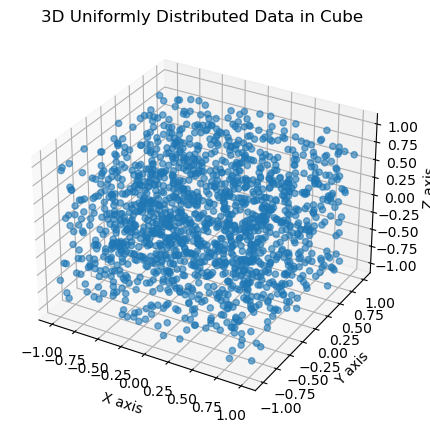

In [5]:
# Plotting the uniformly distributed data inside the 3D cube
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate a 3D dataset uniformly distributed inside a cube
n_samples = 1500
n_features = 3

# Uniformly distributed data in a 3D cube
X_uniform_cube = np.random.uniform(low=-1, high=1, size=(n_samples, n_features))

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_uniform_cube[:, 0], X_uniform_cube[:, 1], X_uniform_cube[:, 2], alpha=0.6)

# Setting labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Uniformly Distributed Data in Cube')
plt.show()


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Applying PCA on uniformly distributed cube data
pca_uniform_cube = PCA()
pca_uniform_cube.fit(X_uniform_cube)

# Variance explained by each principal component
explained_variance_uniform_cube = pca_uniform_cube.explained_variance_ratio_

import plotly.express as px
import pandas as pd

# Prepare data for Plotly
pcs = [1, 2, 3]
variance_explained = explained_variance_uniform_cube
df = pd.DataFrame({"Principal Component": pcs, "Variance Explained": variance_explained})

# Create a bar chart using Plotly
fig = px.bar(df, x="Principal Component", y="Variance Explained", 
             title="Variance Explained by Each Principal Component (Uniform Cube Data)", 
             labels={"Variance Explained": "Variance Explained", "Principal Component": "Principal Component"},
             template="plotly")

fig.show()


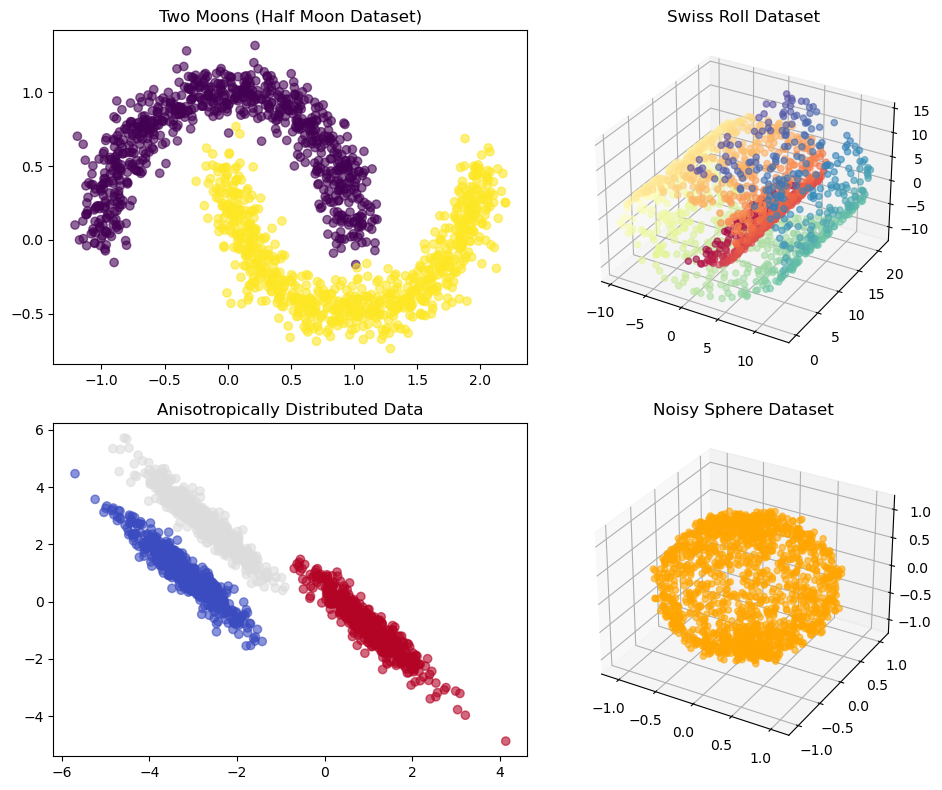

In [13]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_swiss_roll, make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Function to generate uniformly distributed points on a 3D sphere
def uniform_sphere_data(n_samples):
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    phi = np.random.uniform(0, np.pi, n_samples)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return np.stack([x, y, z], axis=1)

# Generate the datasets where PCA is not applicable

# 1. Two Moons (Half-Moon) Dataset
X_moons, y_moons = make_moons(n_samples=1500, noise=0.1)

# 2. Swiss Roll Dataset
X_swiss, _ = make_swiss_roll(n_samples=1500, noise=0.1)

# 3. Anisotropically Distributed Data
X_blobs, y_blobs = make_blobs(n_samples=1500, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_blobs, transformation)

# 4. Noisy Sphere Dataset
n_samples = 1500
X_sphere = uniform_sphere_data(n_samples)
noise_factor = 0.05
X_sphere_noisy = X_sphere + noise_factor * np.random.normal(size=X_sphere.shape)

# Plotting all datasets together
fig = plt.figure(figsize=(10, 8))

# Two Moons (2D)
ax1 = fig.add_subplot(221)
ax1.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', alpha=0.6)
ax1.set_title("Two Moons (Half Moon Dataset)")

# Swiss Roll (3D)
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=_ , cmap='Spectral', alpha=0.6)
ax2.set_title("Swiss Roll Dataset")

# Anisotropically Distributed Data (2D)
ax3 = fig.add_subplot(223)
ax3.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_blobs, cmap='coolwarm', alpha=0.6)
ax3.set_title("Anisotropically Distributed Data")

# Noisy Sphere (3D)
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X_sphere_noisy[:, 0], X_sphere_noisy[:, 1], X_sphere_noisy[:, 2], alpha=0.6, color='orange')
ax4.set_title("Noisy Sphere Dataset")

plt.tight_layout()
plt.show()


### Two Moons Dataset:
Generated using `make_moons`, which creates a non-linearly separable dataset.

### Swiss Roll Dataset:
A 3D structure, generated using `make_swiss_roll`, often used to show how PCA struggles with non-linear data.

### Anisotropically Distributed Data:
Created by transforming blob data using matrix multiplication.

### Noisy Sphere Dataset:
Uniformly distributed points on a sphere, with added noise.


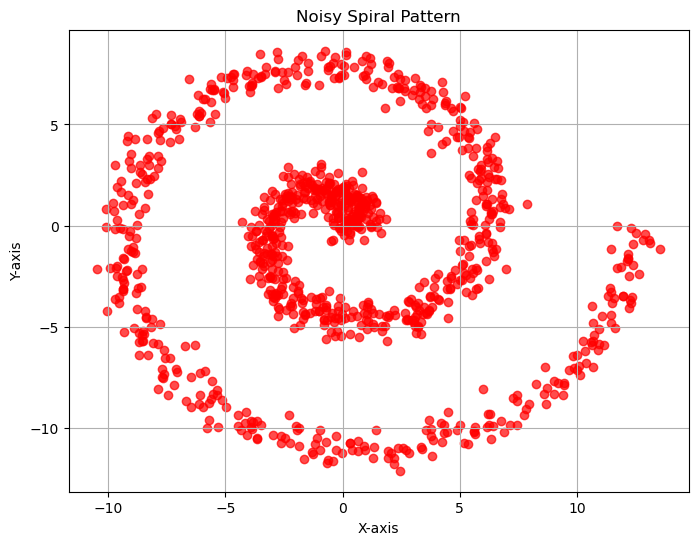

In [21]:
# Generate a spiral pattern with noise

# Parameters for the spiral
n_points = 1000
theta = np.linspace(0, 4 * np.pi, n_points)  # Angle for the spiral
r = theta  # Radius increases with the angle

# Generating the spiral coordinates
x_spiral = r * np.cos(theta)
y_spiral = r * np.sin(theta)

# Adding noise to the spiral
noise_factor = 0.5
x_spiral_noisy = x_spiral + noise_factor * np.random.normal(size=x_spiral.shape)
y_spiral_noisy = y_spiral + noise_factor * np.random.normal(size=y_spiral.shape)

# Plotting the noisy spiral pattern
plt.figure(figsize=(8, 6))
plt.scatter(x_spiral_noisy, y_spiral_noisy, color='r', alpha=0.7)
plt.title("Noisy Spiral Pattern")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


## Dataset Description:
The dataset contains various nutritional features (like **protein, fat, vitamins, and minerals**) across different food products. Our goal is to use PCA to reduce the dimensionality of the dataset while retaining as much of the variance as possible, and then explore which nutrients are most influential in describing the variance across different foods.

In [68]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv('nndb_flat.csv')

In [84]:
df.shape

(8618, 45)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


## Check for highly correlated features

In [88]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

used = []
corrs = []

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Find highly correlated features
for i, j in enumerate(corr_matrix.columns):
    for k in range(len(corr_matrix)):
        if ((corr_matrix.iloc[k, i] > 0.9) & 
            (j not in used) & 
            (j != corr_matrix.index[k])):
            used.append(j)
            corrs.append((j, corr_matrix.index[k], np.round(corr_matrix.iloc[k, i], 2)))

# Convert to DataFrame
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns={0: 'column', 1: 'row', 2: 'corr'})

# Display the first 15 rows
corrsdf[:15]


column               row corr
0        VitA_mcg        VitA_USRDA  1.0
1        VitB6_mg       VitB6_USRDA  1.0
2      VitB12_mcg      VitB12_USRDA  1.0
3         VitC_mg        VitC_USRDA  1.0
4         VitE_mg        VitE_USRDA  1.0
5      Folate_mcg      Folate_USRDA  1.0
6       Niacin_mg      Niacin_USRDA  1.0
7   Riboflavin_mg  Riboflavin_USRDA  1.0
8      Thiamin_mg     Thiamin_USRDA  1.0
9      Calcium_mg     Calcium_USRDA  1.0
10     Copper_mcg      Copper_USRDA  1.0
11   Magnesium_mg   Magnesium_USRDA  1.0
12  Phosphorus_mg  Phosphorus_USRDA  1.0
13   Selenium_mcg    Selenium_USRDA  1.0
14        Zinc_mg        Zinc_USRDA  1.0

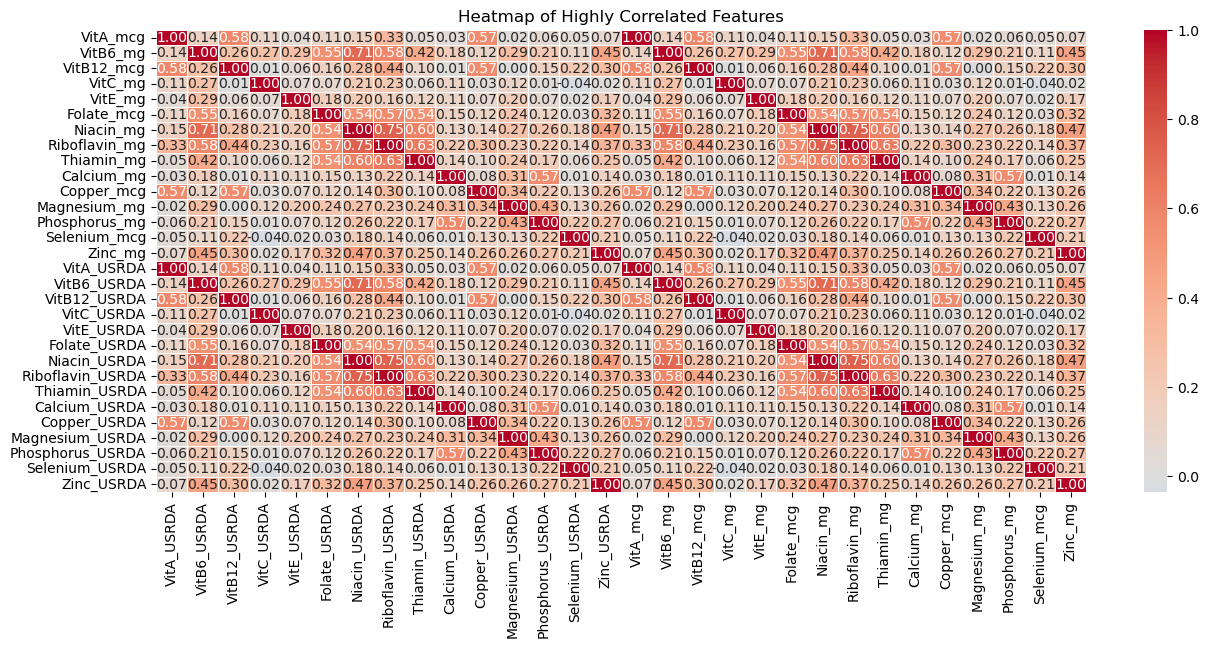

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to visualize the highly correlated features
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix.loc[corrsdf['column'].unique(), corrsdf['row'].unique()], 
            annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)

plt.title('Heatmap of Highly Correlated Features')
plt.show()


## We can see that the "_USRDA" features are redundant. They should be removed

- The "_USRDA" features appear to be redundant because they represent the same information as their corresponding nutrient columns (like VitA_mcg and VitA_USRDA) but in a different unit or scale. 
- For example, both VitA_mcg and VitA_USRDA provide information about Vitamin A, just in micrograms and daily recommended percentage respectively. 
- Since they are perfectly correlated (correlation of 1.0), keeping both columns is unnecessary and may cause multicollinearity issues in models.

In [7]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

## Separate non-numeric features

In [8]:
df.set_index('ID', inplace=True)
df_desc = df.iloc[:, :6]
df.drop(df.columns[:6].values, axis=1, inplace=True)

## Explore the datas' distributions

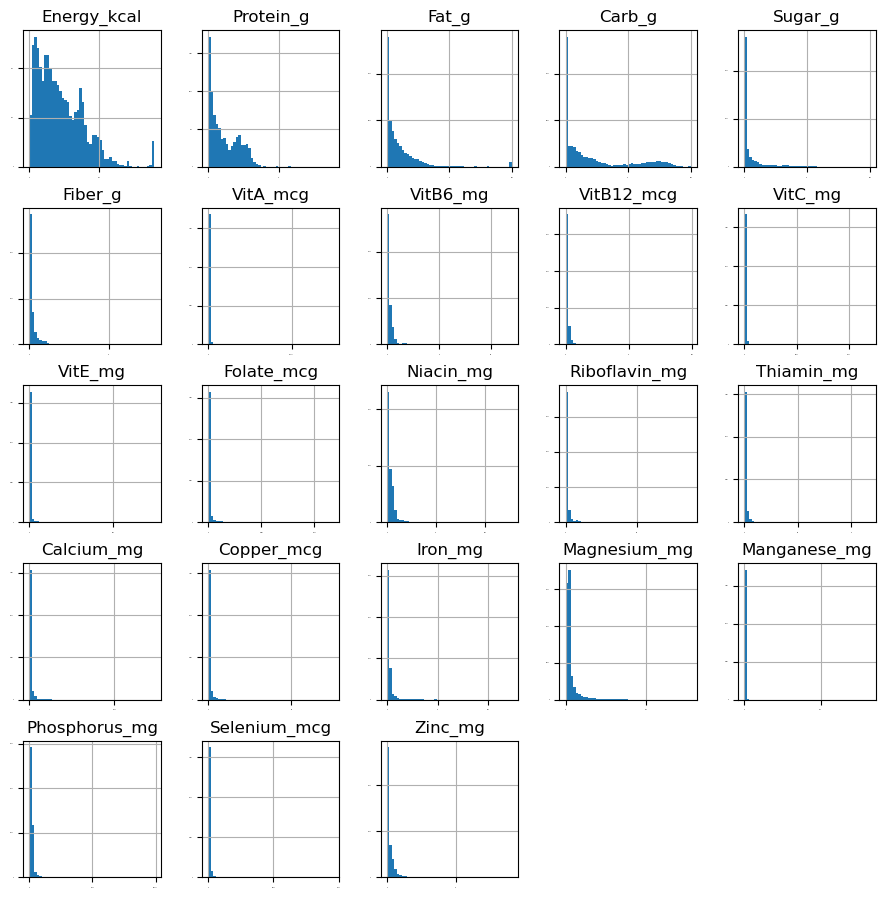

In [9]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

## Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

In [10]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
df = df + 1
df_TF = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_TF["%s_TF" % i] = boxcox(df.loc[:, i])[0] 
#For example, if i is "Energy_kcal", then "%s_TF" % i becomes "Energy_kcal_TF".

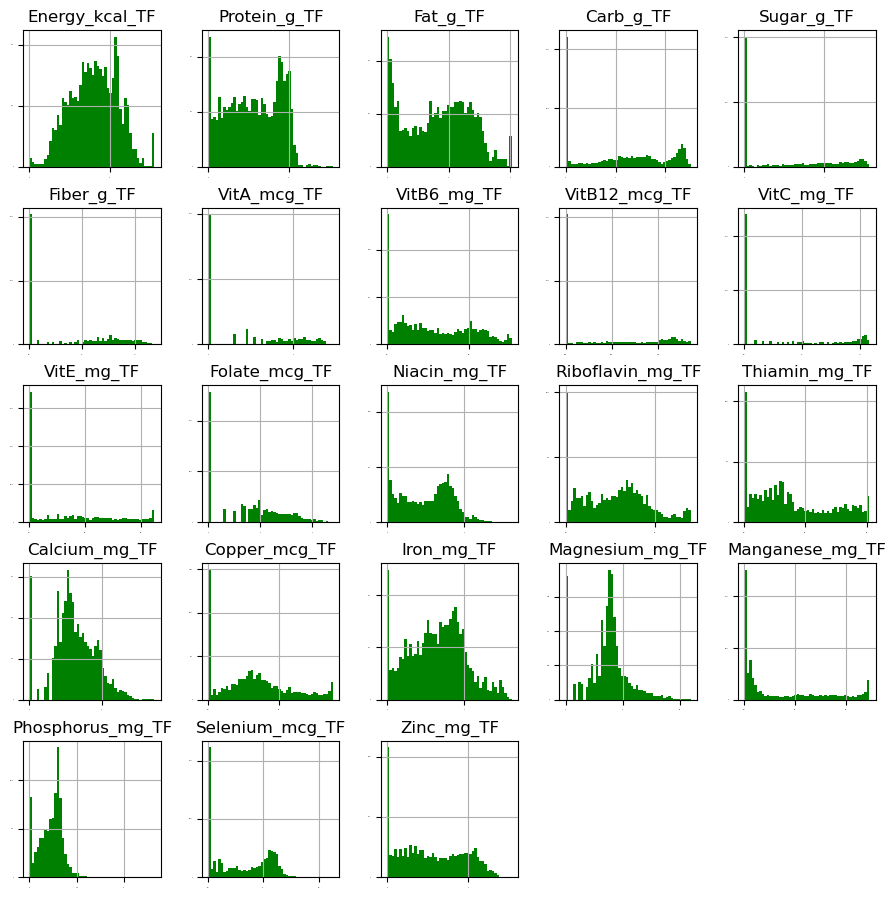

In [11]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11),color = 'green')

## The data definitely "look" better

## To account for different scales of measurement, we'll standardize to mean=0, variance=1.

In [75]:
df_TF.shape

(8618, 23)

In [12]:
# from sklearn.preprocessing import StandardScaler
df_TF = StandardScaler().fit_transform(df_TF)

print("mean: ", np.round(df_TF.mean(), 2))
print ("standard dev: ", np.round(df_TF.std(), 2))

mean:  0.0
standard dev:  1.0


# Implement PCA

In [76]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(df_TF)
pca.shape

(8618, 23)

In [50]:
#print(fit.components_)

In [51]:
# Eigenvalues (variances explained by each principal component)
eigenvalues = fit.explained_variance_
#print("Eigenvalues:")
#print(eigenvalues)

# Eigenvectors (principal components)
eigenvectors = fit.components_
#print("\nEigenvectors:")
#print(eigenvectors)


In [16]:
# Loop through each principal component and print the percentage of variance it captures
for i, variance in enumerate(fit.explained_variance_ratio_):
    print(f"Principal Component {i + 1} captures {variance * 100:.2f}% of the variance.")


Principal Component 1 captures 34.55% of the variance.
Principal Component 2 captures 17.97% of the variance.
Principal Component 3 captures 9.20% of the variance.
Principal Component 4 captures 6.18% of the variance.
Principal Component 5 captures 5.52% of the variance.
Principal Component 6 captures 3.76% of the variance.
Principal Component 7 captures 3.00% of the variance.
Principal Component 8 captures 2.57% of the variance.
Principal Component 9 captures 2.29% of the variance.
Principal Component 10 captures 1.92% of the variance.
Principal Component 11 captures 1.83% of the variance.
Principal Component 12 captures 1.72% of the variance.
Principal Component 13 captures 1.44% of the variance.
Principal Component 14 captures 1.34% of the variance.
Principal Component 15 captures 1.08% of the variance.
Principal Component 16 captures 0.98% of the variance.
Principal Component 17 captures 0.89% of the variance.
Principal Component 18 captures 0.88% of the variance.
Principal Compone

#### check the eigenvalues to find most important components


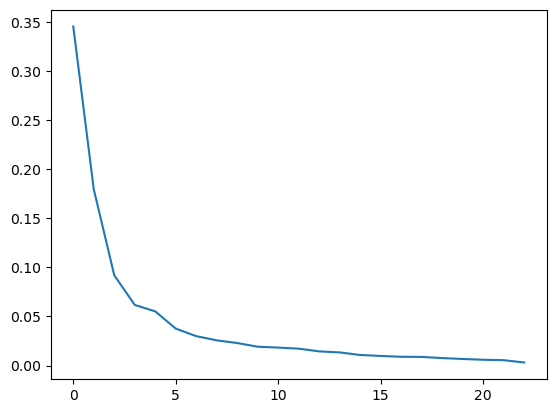

In [17]:
plt.plot(fit.explained_variance_ratio_)

In [18]:
import plotly.graph_objects as go

# Create a Plotly figure for the explained variance ratio plot
fig = go.Figure()

# Add a line trace for explained variance ratio
fig.add_trace(go.Scatter(
    x=list(range(1, len(fit.explained_variance_ratio_) + 1)),
    y=fit.explained_variance_ratio_,
    mode='lines+markers',
    name='Explained Variance Ratio'
))

# Update layout of the plot
fig.update_layout(
    title='Explained Variance Ratio by Principal Component',
    xaxis_title='Principal Component',
    yaxis_title='Explained Variance Ratio',
    template='plotly_white'
)

# Show the Plotly plot
fig.show()


In [19]:
print(fit.explained_variance_ratio_)
print("--------------------------------------------------")
#print sum of first five
print("Sum of variance explained by first five components:",fit.explained_variance_ratio_[:5].sum())

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
--------------------------------------------------
Sum of variance explained by first five components: 0.7342383069254741


In [20]:
# Print the explained variance ratio without scientific notation
# Set numpy print options to suppress scientific notation
np.set_printoptions(suppress=True)

# Print the explained variance ratio
fit.explained_variance_ratio_


array([0.34554936, 0.17971019, 0.09201387, 0.06176452, 0.05520037,
       0.03764111, 0.02996247, 0.02566808, 0.02294417, 0.0192006 ,
       0.01828886, 0.01721459, 0.01443828, 0.01337614, 0.0107629 ,
       0.00977106, 0.00894584, 0.00878398, 0.00760274, 0.00668982,
       0.00589323, 0.00545379, 0.00312402])

In [21]:
import plotly.graph_objects as go

# Assuming cumulative_variance has already been computed:
cumulative_variance = fit.explained_variance_ratio_.cumsum()

# Create a Plotly figure for the cumulative variance plot
fig = go.Figure()

# Add a line trace for cumulative variance
fig.add_trace(go.Scatter(
    x=list(range(1, len(cumulative_variance) + 1)),
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Explained Variance'
))

# Update layout of the plot
fig.update_layout(
    title='Cumulative Explained Variance by Number of Principal Components',
    xaxis_title='Number of Principal Components',
    yaxis_title='Cumulative Explained Variance',
    template='plotly_white'
)

# Show the Plotly plot
fig.show()


#### the first 5 eigenvectors account for 73% of the variance and will be kept

In [81]:
# Create a DataFrame with the first 5 principal components
pca_df = pd.DataFrame(pca[:, :5], index=df.index) 

print(pca_df.shape)

(8618, 5)


In [22]:
# Display the first few rows of the new PCA DataFrame
pca_df.head()

0         1         2         3         4
ID                                                    
1001 -2.638414 -1.702512  1.283725  3.759546  2.413650
1002 -2.537931 -1.550464  1.279816  3.634065  2.492683
1003 -3.751335 -2.080190  2.067932  3.668154  2.457203
1004  2.000578 -1.361858 -0.395834  2.432792  0.887796
1005  1.582713 -1.321484 -0.238444  2.597599  1.286317

In [23]:
pca = pca_df.join(df_desc)
pca.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [24]:
pca

c1        c2        c3        c4        c5  \
ID                                                        
1001  -2.638414 -1.702512  1.283725  3.759546  2.413650   
1002  -2.537931 -1.550464  1.279816  3.634065  2.492683   
1003  -3.751335 -2.080190  2.067932  3.668154  2.457203   
1004   2.000578 -1.361858 -0.395834  2.432792  0.887796   
1005   1.582713 -1.321484 -0.238444  2.597599  1.286317   
...         ...       ...       ...       ...       ...   
83110  2.844598 -2.069960 -0.887874  2.410677  1.280042   
90240  0.273762 -2.042215 -1.414027 -0.765610  0.660368   
90480 -3.288600  0.689374  1.810229 -0.687688 -1.138601   
90560  1.781538 -0.735901 -1.999946  0.571493  1.796475   
93600  1.210574 -1.204741 -2.169510  0.651995  0.653914   

                            FoodGroup                ShortDescrip  \
ID                                                                  
1001           Dairy and Egg Products            BUTTER,WITH SALT   
1002           Dairy and Egg Products    BUTTER,WHIPPED,WITH SALT   
1003           Dairy and Egg Products        BUTTER OIL,ANHYDROUS   
1004           Dairy and Egg Products                 CHEESE,BLUE   
1005           Dairy and Egg Products                CHEESE,BRICK   
...                               ...                         ...   
83110  Finfish and Shellfish Products             MACKEREL,SALTED   
90240  Finfish and Shellfish Products  SCALLOP,(BAY&SEA),CKD,STMD   
90480                          Sweets                  SYRUP,CANE   
90560  Finfish and Shellfish Products                   SNAIL,RAW   
93600  Finfish and Shellfish Products            TURTLE,GREEN,RAW   

                                                 Descrip  
ID                                                        
1001                                      Butter, salted  
1002                          Butter, whipped, with salt  
1003                               Butter oil, anhydrous  
1004                                        Cheese, blue  
1005                                       Cheese, brick  
...                                                  ...  
83110                             Fish, mackerel, salted  
90240  Mollusks, scallop, (bay and sea), cooked, steamed  
90480                                        Syrup, Cane  
90560                               Mollusks, snail, raw  
93600                                 Turtle, green, raw  

[8618 rows x 8 columns]

In [72]:
pca_df

0         1         2         3         4
ID                                                     
1001  -2.638414 -1.702512  1.283725  3.759546  2.413650
1002  -2.537931 -1.550464  1.279816  3.634065  2.492683
1003  -3.751335 -2.080190  2.067932  3.668154  2.457203
1004   2.000578 -1.361858 -0.395834  2.432792  0.887796
1005   1.582713 -1.321484 -0.238444  2.597599  1.286317
...         ...       ...       ...       ...       ...
83110  2.844598 -2.069960 -0.887874  2.410677  1.280042
90240  0.273762 -2.042215 -1.414027 -0.765610  0.660368
90480 -3.288600  0.689374  1.810229 -0.687688 -1.138601
90560  1.781538 -0.735901 -1.999946  0.571493  1.796475
93600  1.210574 -1.204741 -2.169510  0.651995  0.653914

[8618 rows x 5 columns]

In [71]:
pca_df.corr()

0             1             2             3             4
0  1.000000e+00  5.888922e-18 -1.119093e-15  2.320218e-16 -1.230049e-16
1  5.888922e-18  1.000000e+00  6.812392e-18 -4.893614e-16 -1.736865e-16
2 -1.119093e-15  6.812392e-18  1.000000e+00  9.404697e-17 -3.696653e-16
3  2.320218e-16 -4.893614e-16  9.404697e-17  1.000000e+00  1.235572e-16
4 -1.230049e-16 -1.736865e-16 -3.696653e-16  1.235572e-16  1.000000e+00

In [25]:
# we see that the five vectors are orthogonal
np.round(pca_df.corr(), 5)

0    1    2    3    4
0  1.0  0.0 -0.0  0.0 -0.0
1  0.0  1.0  0.0 -0.0 -0.0
2 -0.0  0.0  1.0  0.0 -0.0
3  0.0 -0.0  0.0  1.0  0.0
4 -0.0 -0.0 -0.0  0.0  1.0

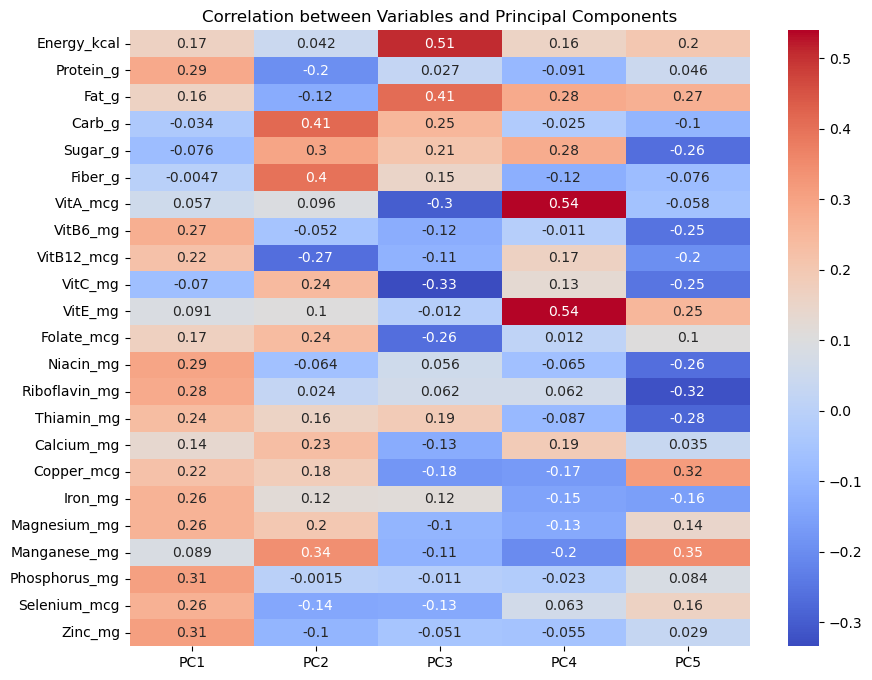

In [49]:
#Get the first 5 principal components (or as many as you'd like)
vects = fit.components_[:5]

# Create a DataFrame where rows are variables and columns are PCs
pc_df = pd.DataFrame(vects.T, index=df.columns, columns=[f'PC{i+1}' for i in range(5)])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pc_df, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Principal Components')
plt.show()


# Interpretation of Correlation Heatmap between Variables and Principal Components (PCs)

This heatmap visualizes the correlation between the original variables (features) and the first five principal components (PC1 through PC5) from the PCA. Each cell represents the strength and direction of the relationship between a particular variable and a principal component.

## Key Points:

### <span style="font-size:20px; color:blue">PC1 (Principal Component 1):</span>
- **<span style="color:red">Zinc_mg (0.31)</span>**, **<span style="color:red">Protein_g (0.29)</span>**, **<span style="color:red">Niacin_mg (0.29)</span>**, and **<span style="color:red">Riboflavin_mg (0.28)</span>** are the most positively correlated variables with PC1.
- This suggests that **PC1** represents a component where foods with high protein, zinc, niacin, and riboflavin contents dominate. These nutrients vary together along this component.
- **<span style="color:green">Sugar_g (-0.076)</span>** and **<span style="color:green">VitC_mg (-0.07)</span>** are slightly negatively correlated, but these relationships are weak.

**<span style="color:blue; font-size:18px">Interpretation</span>**: PC1 might represent a nutrient profile rich in essential vitamins and minerals like zinc, niacin, and protein, commonly found in nutrient-dense foods.

### <span style="font-size:20px; color:blue">PC2 (Principal Component 2):</span>
- **<span style="color:red">Carb_g (0.41)</span>**, **<span style="color:red">Fiber_g (0.4)</span>**, and **<span style="color:red">VitC_mg (0.24)</span>** are positively correlated with PC2.
- **<span style="color:green">VitB12_mcg (-0.27)</span>** and **<span style="color:green">Protein_g (-0.2)</span>** are negatively correlated, which implies that foods rich in fiber and carbohydrates tend to have lower levels of vitamin B12 and protein.

**<span style="color:blue; font-size:18px">Interpretation</span>**: PC2 may represent a carbohydrate-rich component, possibly reflecting plant-based foods (grains, fruits, vegetables) that are rich in fiber and vitamins like vitamin C but lower in animal-derived nutrients like vitamin B12 and protein.

### <span style="font-size:20px; color:blue">PC3 (Principal Component 3):</span>
- **<span style="color:red">VitA_mcg (-0.3)</span>** and **<span style="color:green">VitB12_mcg (-0.11)</span>** are negatively correlated with PC3, while **<span style="color:red">VitA_mcg (0.54)</span>** is highly positively correlated with PC4.
- This suggests that **PC3** and **PC4** capture different aspects of foods rich in vitamin A, where PC4 emphasizes the presence of **<span style="color:red">VitA_mcg (0.54)</span>** positively.

**<span style="color:blue; font-size:18px">Interpretation</span>**: PC3 may capture some unique differences in vitamins, with a balance between high vitamin A foods and other vitamins.

### <span style="font-size:20px; color:blue">PC4 (Principal Component 4):</span>
- **<span style="color:red">VitA_mcg (0.54)</span>** and **<span style="color:red">VitE_mg (0.54)</span>** are highly positively correlated with PC4.

**<span style="color:blue; font-size:18px">Interpretation</span>**: PC4 likely captures foods rich in fat-soluble vitamins such as vitamin A and vitamin E.

### <span style="font-size:20px; color:blue">PC5 (Principal Component 5):</span>
- **<span style="color:red">Copper_mcg (0.32)</span>** and **<span style="color:red">VitE_mg (0.25)</span>** show strong positive correlation, indicating that PC5 might reflect nutrient profiles that are copper-rich.
- **<span style="color:green">Niacin_mg (-0.26)</span>** and **<span style="color:green">Riboflavin_mg (-0.32)</span>** are negatively correlated, suggesting that foods high in niacin and riboflavin may not contain high levels of copper.

**<span style="color:blue; font-size:18px">Interpretation</span>**: PC5 may represent a trade-off between copper and niacin/riboflavin levels in different foods.

## Overall Takeaway:
Each principal component (PC1 to PC5) captures different patterns of variation in the dataset. By examining the correlations between the original variables and each PC:

- **PC1**: Captures overall nutrient density with protein, zinc, and vitamins.
- **PC2**: Captures carbohydrate-rich foods with high fiber and vitamin C.
- **PC3 & PC4**: Capture vitamins, with PC4 focusing on vitamin A and E.
- **PC5**: Differentiates between copper-rich foods and those rich in niacin/riboflavin.



C:\Users\Milan Amrut Joshi\AppData\Local\Temp\ipykernel_30088\4072189045.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



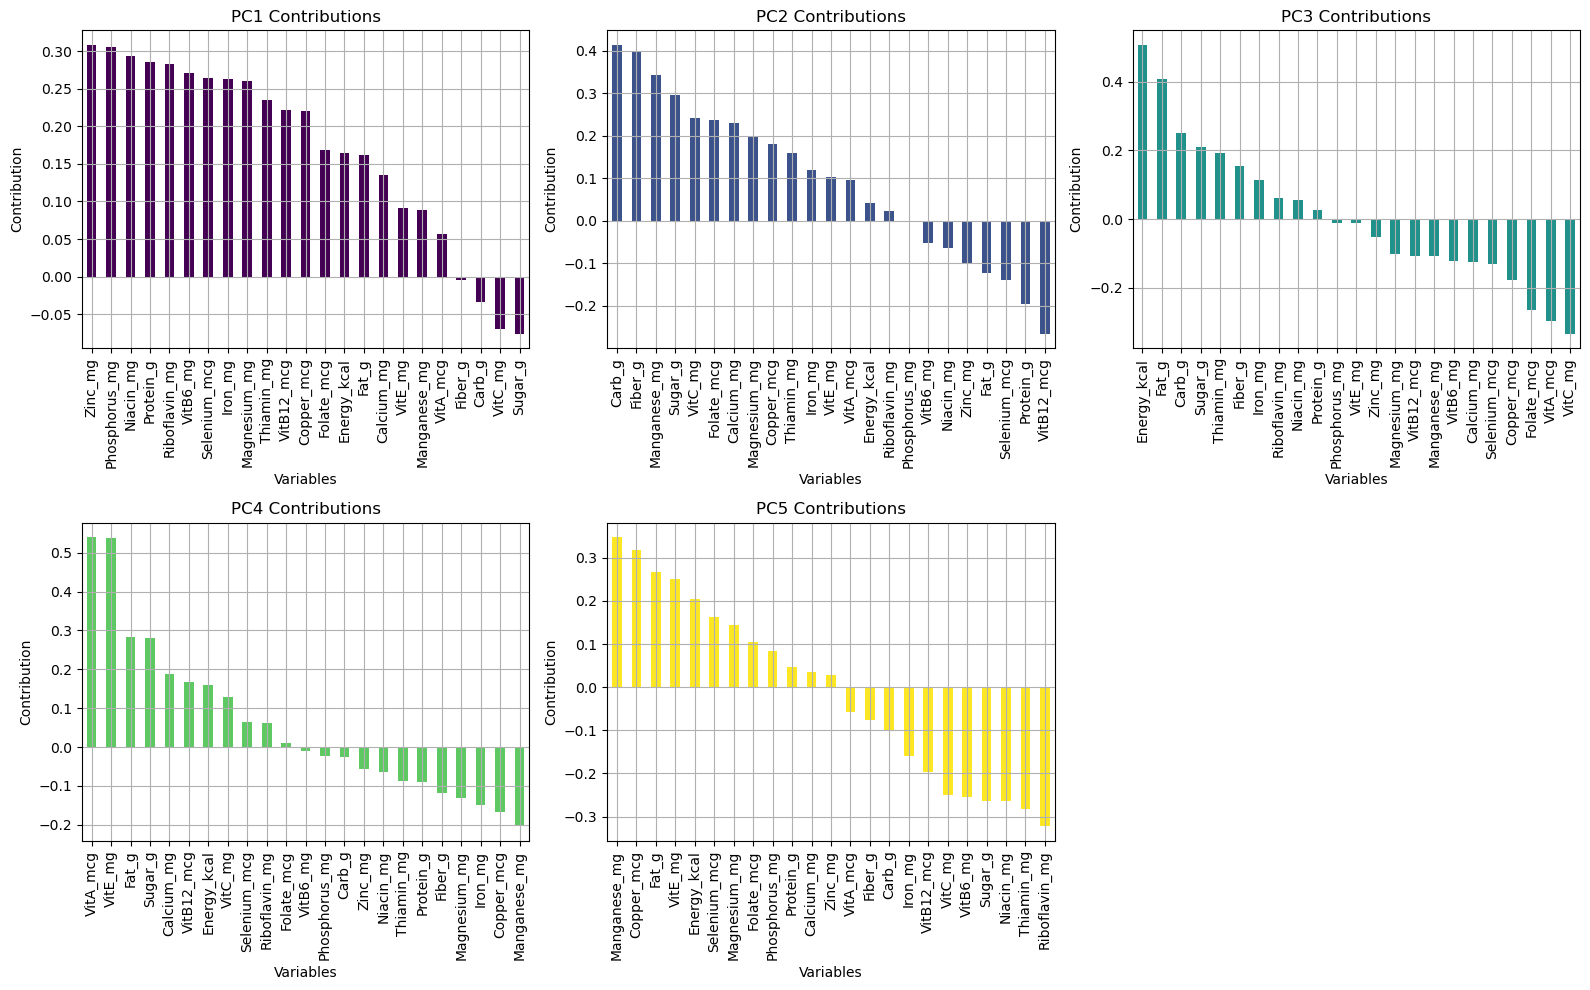

In [65]:
# Create a 2x3 subplot window for the first 5 PCs
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Flatten the axes array for easy iteration and then remove the extra axis (since we only need 5)
axes = axes.flatten()

# Loop through the first 5 PCs and plot contributions
colors = plt.cm.get_cmap('viridis', 5)  # Get a colormap with 5 colors

for i in range(5):  # First 5 PCs
    # Get the contributions and sort them
    pc_contributions = pd.Series(fit.components_[i], index=df.columns).sort_values(ascending=False)
    
    # Plot contributions with color
    pc_contributions.plot(kind='bar', ax=axes[i], color=colors(i), title=f'PC{i+1} Contributions')

    # Customize plot aesthetics
    axes[i].set_ylabel('Contribution')
    axes[i].set_xlabel('Variables')
    axes[i].grid(True)

# Remove the last empty subplot (6th one)
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()



## Try to interpret the components

(this is where deep subject matter expertise, in this case nutrition, comes in handy)

**Component one** 

foods that are high in: zinc, and other vitamins and minerals

low in: sugar, vitamin C, Carbs, and fiber

In [46]:
vects = fit.components_[:5]
vects

array([[ 0.16512628,  0.28608595,  0.16148847, -0.03376713, -0.07613188,
        -0.0046634 ,  0.05699607,  0.2706465 ,  0.2213216 , -0.06983022,
         0.09080767,  0.16785649,  0.29409384,  0.28268656,  0.23543974,
         0.13551157,  0.22023186,  0.26231406,  0.26024478,  0.08876195,
         0.30500043,  0.26411374,  0.30850596],
       [ 0.04185011, -0.19612698, -0.12357548,  0.41454153,  0.29564023,
         0.39783227,  0.0957005 , -0.0521657 , -0.26567098,  0.24231394,
         0.10430995,  0.23839136, -0.06419697,  0.0242405 ,  0.15964121,
         0.23105209,  0.18163094,  0.11891749,  0.19983767,  0.34360302,
        -0.0015173 , -0.13888339, -0.10052931],
       [ 0.50806205,  0.02682842,  0.40950485,  0.25095208,  0.20865125,
         0.15364033, -0.29808857, -0.12185037, -0.10747636, -0.33448952,
        -0.01247288, -0.26429784,  0.0559907 ,  0.06207402,  0.19112446,
        -0.12562075, -0.1777019 ,  0.11506541, -0.10079212, -0.10875496,
        -0.0109477 , -0.1317

In [36]:
one = pd.Series(vects[0], index=df.columns)
one.sort_values(ascending=False)

Zinc_mg          0.308506
Phosphorus_mg    0.305000
Niacin_mg        0.294094
Protein_g        0.286086
Riboflavin_mg    0.282687
VitB6_mg         0.270646
Selenium_mcg     0.264114
Iron_mg          0.262314
Magnesium_mg     0.260245
Thiamin_mg       0.235440
VitB12_mcg       0.221322
Copper_mcg       0.220232
Folate_mcg       0.167856
Energy_kcal      0.165126
Fat_g            0.161488
Calcium_mg       0.135512
VitE_mg          0.090808
Manganese_mg     0.088762
VitA_mcg         0.056996
Fiber_g         -0.004663
Carb_g          -0.033767
VitC_mg         -0.069830
Sugar_g         -0.076132
dtype: float64

**Component two**

High: Carbs, Fiber, Mang, Sugar, Vitamin C...

Low: Vitamine B12, protein, selenium, Fat...

In [37]:
two = pd.Series(vects[1], index=df.columns)
two.sort_values(ascending=False)

Carb_g           0.414542
Fiber_g          0.397832
Manganese_mg     0.343603
Sugar_g          0.295640
VitC_mg          0.242314
Folate_mcg       0.238391
Calcium_mg       0.231052
Magnesium_mg     0.199838
Copper_mcg       0.181631
Thiamin_mg       0.159641
Iron_mg          0.118917
VitE_mg          0.104310
VitA_mcg         0.095701
Energy_kcal      0.041850
Riboflavin_mg    0.024240
Phosphorus_mg   -0.001517
VitB6_mg        -0.052166
Niacin_mg       -0.064197
Zinc_mg         -0.100529
Fat_g           -0.123575
Selenium_mcg    -0.138883
Protein_g       -0.196127
VitB12_mcg      -0.265671
dtype: float64

**Component three**

High: calories, fat, carbs, sugar...

Low: vitamin A, vitamin C, folate, copper...

In [38]:
three = pd.Series(vects[2], index=df.columns)
three.sort_values(ascending=False)

Energy_kcal      0.508062
Fat_g            0.409505
Carb_g           0.250952
Sugar_g          0.208651
Thiamin_mg       0.191124
Fiber_g          0.153640
Iron_mg          0.115065
Riboflavin_mg    0.062074
Niacin_mg        0.055991
Protein_g        0.026828
Phosphorus_mg   -0.010948
VitE_mg         -0.012473
Zinc_mg         -0.051002
Magnesium_mg    -0.100792
VitB12_mcg      -0.107476
Manganese_mg    -0.108755
VitB6_mg        -0.121850
Calcium_mg      -0.125621
Selenium_mcg    -0.131798
Copper_mcg      -0.177702
Folate_mcg      -0.264298
VitA_mcg        -0.298089
VitC_mg         -0.334490
dtype: float64

**Component four**

High: vitamin A, vitamin E, fat, sugar, calcium, vitamin B12, calories...

Low: manganese, copper, iron, magnesium, fiber

In [39]:
four = pd.Series(vects[3], index=df.columns)
four.sort_values(ascending=False)

VitA_mcg         0.539792
VitE_mg          0.537710
Fat_g            0.282774
Sugar_g          0.279657
Calcium_mg       0.188343
VitB12_mcg       0.167068
Energy_kcal      0.158787
VitC_mg          0.129288
Selenium_mcg     0.063452
Riboflavin_mg    0.061855
Folate_mcg       0.011655
VitB6_mg        -0.011382
Phosphorus_mg   -0.022623
Carb_g          -0.025185
Zinc_mg         -0.055472
Niacin_mg       -0.065223
Thiamin_mg      -0.086530
Protein_g       -0.090944
Fiber_g         -0.119122
Magnesium_mg    -0.131683
Iron_mg         -0.149698
Copper_mcg      -0.167872
Manganese_mg    -0.203804
dtype: float64

**Component five**

High: riboflavin, thiamin, niacin, sugar, vitB6, vitC, vitB12...

Low: manganese, copper, fat, vitE, calories, magnesium

In [40]:
five = pd.Series(vects[4], index=df.columns)
five.sort_values(ascending=False)

Manganese_mg     0.347515
Copper_mcg       0.316998
Fat_g            0.266740
VitE_mg          0.250605
Energy_kcal      0.204336
Selenium_mcg     0.163561
Magnesium_mg     0.143789
Folate_mcg       0.105000
Phosphorus_mg    0.084178
Protein_g        0.046148
Calcium_mg       0.035398
Zinc_mg          0.029074
VitA_mcg        -0.057928
Fiber_g         -0.075900
Carb_g          -0.101396
Iron_mg         -0.158585
VitB12_mcg      -0.195637
VitC_mg         -0.249634
VitB6_mg        -0.254663
Sugar_g         -0.264262
Niacin_mg       -0.264423
Thiamin_mg      -0.281944
Riboflavin_mg   -0.322545
dtype: float64

## Now let's look at which food groups are highest in each component

## 1 

In [41]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

FoodGroup
Soups, Sauces, and Gravies             190
Beverages                              167
Sweets                                  45
Vegetables and Vegetable Products       20
Fruits and Fruit Juices                 16
Legumes and Legume Products             16
Baby Foods                              10
Meals, Entrees, and Side Dishes          9
Spices and Herbs                         7
Fats and Oils                            7
American Indian/Alaska Native Foods      5
Snacks                                   3
Baked Products                           2
Fast Foods                               2
Sausages and Luncheon Meats              1
Name: count, dtype: int64

# Interpretation of FoodGroup Counts

The output shows the **distribution of food groups** in the **first 500 rows** that have the **lowest values for the 'c1' principal component** (sorted by 'c1'). This helps us understand which food groups contribute most strongly to the lower values of this component.

### Key Findings:

1. **<span style="color:blue; font-size:18px">Soups, Sauces, and Gravies</span>**:
   - This food group appears **190 times**, making it the most frequent food group among the 500 rows with the lowest 'c1' values.
   - **Interpretation**: Foods in the "Soups, Sauces, and Gravies" group are strongly associated with low values in the 'c1' component, indicating that these foods likely have attributes that align with the factors captured by this component.

2. **<span style="color:blue; font-size:18px">Beverages</span>**:
   - The second most frequent group is **Beverages**, appearing **167 times**.
   - **Interpretation**: Like soups and sauces, beverages are closely linked to lower 'c1' values, suggesting a pattern of association with the factors represented by the principal component.

3. **<span style="color:green; font-size:18px">Sweets</span>**:
   - This group appears **45 times**.
   - **Interpretation**: Although less frequent than "Soups" and "Beverages", "Sweets" still contribute notably to the lower 'c1' scores.

4. **<span style="color:green; font-size:18px">Vegetables and Vegetable Products</span>**:
   - This group appears **20 times**.
   - **Interpretation**: Vegetables are less associated with lower 'c1' values compared to soups and beverages, but they still make up a portion of the foods in this component's lower range.

5. **<span style="color:green; font-size:18px">Fruits and Fruit Juices</span>** and **<span style="color:green; font-size:18px">Legumes and Legume Products</span>**:
   - Both groups appear **16 times**.
   - **Interpretation**: Fruits and legumes have a similar, moderate association with lower 'c1' values.

6. **<span style="color:orange; font-size:18px">Other Food Groups</span>**:
   - Groups like **Baby Foods (10)**, **Meals, Entrees, and Side Dishes (9)**, **Spices and Herbs (7)**, and **Fats and Oils (7)** contribute less frequently to the lower 'c1' values.
   - **Interpretation**: These foods are less aligned with the characteristics represented by low 'c1' values, but still have some presence in the dataset.

7. **<span style="color:orange; font-size:18px">Rarely Appearing Groups</span>**:
   - **Snacks (3)**, **Baked Products (2)**, **Fast Foods (2)**, and **Sausages and Luncheon Meats (1)** are the least frequent.
   - **Interpretation**: These foods have minimal association with lower 'c1' values and are less represented in the principal component's low end.

### Overall Interpretation:
- **"Soups, Sauces, and Gravies"** and **"Beverages"** dominate the lower spectrum of 'c1', which suggests that these food groups have a specific set of characteristics (such as nutrient composition or other factors) captured by this principal component.
- Other groups, such as **Sweets**, **Vegetables**, **Fruits**, and **Legumes**, are present but less frequent, indicating a weaker association with lower 'c1' values.
- The **less frequent food groups**, such as **Snacks**, **Fast Foods**, and **Baked Products**, suggest that these foods are not strongly aligned with the factors driving the principal component 'c1'.

This analysis highlights how different food groups relate to the first principal component and gives insight into the types of foods contributing to the lower 'c1' values.


## 2

In [42]:
pca.sort_values(by='c2')['FoodGroup'][:500].value_counts()

FoodGroup
Beef Products                          353
Lamb, Veal, and Game Products           71
Poultry Products                        21
American Indian/Alaska Native Foods     13
Fats and Oils                           13
Pork Products                            9
Finfish and Shellfish Products           8
Sausages and Luncheon Meats              4
Restaurant Foods                         3
Fast Foods                               3
Beverages                                2
Name: count, dtype: int64

## 3

In [43]:
pca.sort_values(by='c3')['FoodGroup'][:500].value_counts()

FoodGroup
Vegetables and Vegetable Products      344
Finfish and Shellfish Products          68
Poultry Products                        19
Beverages                               10
Soups, Sauces, and Gravies              10
Lamb, Veal, and Game Products            9
Fruits and Fruit Juices                  9
Baby Foods                               7
Spices and Herbs                         6
Fast Foods                               5
Beef Products                            4
Pork Products                            4
American Indian/Alaska Native Foods      2
Nut and Seed Products                    2
Dairy and Egg Products                   1
Name: count, dtype: int64

## 4

In [44]:
pca.sort_values(by='c4')['FoodGroup'][:500].value_counts()

FoodGroup
Legumes and Legume Products            124
Cereal Grains and Pasta                 98
Vegetables and Vegetable Products       89
Baked Products                          39
Nut and Seed Products                   34
Breakfast Cereals                       23
Snacks                                  19
American Indian/Alaska Native Foods     18
Beverages                               16
Sweets                                  15
Sausages and Luncheon Meats              6
Lamb, Veal, and Game Products            6
Spices and Herbs                         5
Soups, Sauces, and Gravies               2
Fruits and Fruit Juices                  2
Finfish and Shellfish Products           2
Baby Foods                               1
Poultry Products                         1
Name: count, dtype: int64

## 5

In [45]:
pca.sort_values(by='c5')['FoodGroup'][:500].value_counts()

FoodGroup
Breakfast Cereals                      213
Baked Products                         144
Legumes and Legume Products             52
Beverages                               30
Baby Foods                              16
Fast Foods                              12
Snacks                                   9
Dairy and Egg Products                   6
American Indian/Alaska Native Foods      6
Fruits and Fruit Juices                  4
Finfish and Shellfish Products           2
Vegetables and Vegetable Products        1
Spices and Herbs                         1
Lamb, Veal, and Game Products            1
Poultry Products                         1
Meals, Entrees, and Side Dishes          1
Soups, Sauces, and Gravies               1
Name: count, dtype: int64

In [111]:
import wbdata as wb
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [105]:
wbdata.get_indicators(source=1)


id                                                 name
-------------------------------------------------  ---------------------------------------------------------------------------------------------------------------
ENF.CONT.COEN.ATDR                                 Enforcing contracts: Alternative dispute resolution (0-3) (DB16-20 methodology)
ENF.CONT.COEN.ATFE.PR                              Enforcing contracts: Attorney fees (% of claim)
ENF.CONT.COEN.COST.ZS                              Enforcing contracts: Cost (% of claim)
ENF.CONT.COEN.COST.ZS.DFRN                         Enforcing contracts: Cost (% of claim) - Score
ENF.CONT.COEN.CSMG                                 Enforcing contracts: Case management (0-6) (DB16-20 methodology)
ENF.CONT.COEN.CTAU                                 Enforcing contracts: Court automation (0-4) (DB17-20 methodology)
ENF.CONT.COEN.CTFE.PR                              Enforcing contracts: Court fees (% of claim)
ENF.CONT.COEN.CTSP.DB1719         

In [108]:
wbdata.get_countries(query='Africa')

id    name
----  --------------------------------------------------------------------------------
AFE   Africa Eastern and Southern
AFR   Africa
AFW   Africa Western and Central
BMN   Middle East & North Africa (IBRD-only countries)
BSS   Sub-Saharan Africa (IBRD-only countries)
CAA   Sub-Saharan Africa (IFC classification)
CAF   Central African Republic
CME   Middle East and North Africa (IFC classification)
DMN   Middle East & North Africa (IDA-eligible countries)
DNS   IDA countries in Sub-Saharan Africa not classified as fragile situations
DSF   IDA countries in Sub-Saharan Africa classified as fragile situations
DSS   Sub-Saharan Africa (IDA-eligible countries)
FXS   IDA countries classified as fragile situations, excluding Sub-Saharan Africa
MEA   Middle East & North Africa
MNA   Middle East & North Africa (excluding high income)
NAF   North Africa
NRS   Non-resource rich Sub-Saharan Africa countries
NXS   IDA countries not classified as fragile situations, excluding Sub-Saharan 

In [107]:
wbdata.get_data("IC.BUS.EASE.XQ", country="USA")

[{'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2023',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2022',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2021',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.EASE.XQ',
   'value': 'Ease of doing business rank (1=most business-friendly regulations)'},
  'coun

In [110]:
wbdata.get_indicators(query="gdp per capita", source=2)

id                 name
-----------------  -------------------------------------------------------------------
NY.GDP.PCAP.CD     GDP per capita (current US$)
NY.GDP.PCAP.CN     GDP per capita (current LCU)
NY.GDP.PCAP.KD     GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)
NY.GDP.PCAP.KN     GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD  GDP per capita, PPP (current international $)
NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2021 international $)
SE.XPD.PRIM.PC.ZS  Government expenditure per student, primary (% of GDP per capita)
SE.XPD.SECO.PC.ZS  Government expenditure per student, secondary (% of GDP per capita)
SE.XPD.TERT.PC.ZS  Government expenditure per student, tertiary (% of GDP per capita)

In [1]:
#!pip install wbgapi
import wbgapi as wb

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [119]:
wb.search('GDP')

========
Series: BG.GSR.NFSV.GD.ZS

IndicatorName: Trade in services (% of GDP)
--------
Longdefinition: Trade in services is the sum of service exports and imports divided by the value of GDP, all in current U.S. dollars.
--------
Source: ...Balance of Payments Statistics Yearbook and data files, and World Bank and OECD GDP estimates....
========
Series: BM.KLT.DINV.WD.GD.ZS

IndicatorName: Foreign direct investment, net outflows (% of GDP)
--------
Longdefinition: ...from the reporting economy to the rest of the world, and is divided by GDP....
========
Series: BN.CAB.XOKA.GD.ZS

IndicatorName: Current account balance (% of GDP)
--------
Source: ...Balance of Payments Statistics Yearbook and data files, and World Bank and OECD GDP estimates....
========
Series: BX.KLT.DINV.WD.GD.ZS

IndicatorName: Foreign direct investment, net inflows (% of GDP)
--------
Longdefinition: ... in the reporting economy from foreign investors, and is divided by GDP....
--------
Source: ...databases, World Bank, International Debt Statistics, and World Bank and OECD GDP estimates....
========
Series: BX.TRF.PWKR.DT.GD.ZS

IndicatorName: Personal remittances, received (% of GDP)
--------
Source: ...staff estimates based on IMF balance of payments data, and World Bank and OECD GDP estimates....
========
Series: CM.MKT.LCAP.GD.ZS

IndicatorName: Market capitalization of listed domestic companies (% of GDP)
========
Series: CM.MKT.TRAD.GD.ZS

IndicatorName: Stocks traded, total value (% of GDP)
========
Series: DT.DOD.DECT.GN.ZS

Developmentrelevance: ...a) debt to GDP ratio...
========
Series: DT.DOD.DSTC.IR.ZS

Developmentrelevance: ...a) debt to GDP ratio...
========
Series: DT.DOD.DSTC.ZS

Developmentrelevance: ...a) debt to GDP ratio...
========
Series: DT.DOD.PVLX.EX.ZS

Developmentrelevance: ...a) debt to GDP ratio...
========
Series: DT.DOD.PVLX.GN.ZS

Developmentrelevance: ...a) debt to GDP ratio...
========
Series: DT.TDS.DECT.EX.ZS

Developmentrelevance: ...a) debt to GDP ratio...
========
Series: EG.EGY.PRIM.PP.KD

IndicatorName: Energy intensity level of primary energy (MJ/$2017 PPP GDP)
========
Series: EG.GDP.PUSE.KO.PP

IndicatorName: GDP per unit of energy use (PPP $ per kg of oil equivalent)
--------
Longdefinition: ...GDP per unit of energy use is the PPP GDP per kilogram of oil equivalent of energy use. PPP GDP is gross domestic product...
========
Series: EG.GDP.PUSE.KO.PP.KD

IndicatorName: GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)
--------
Longdefinition: ...GDP per unit of energy use is the PPP GDP per kilogram of oil equivalent of energy use. PPP GDP is gross domestic product...
--------
Statisticalconceptandmethodology: ...The ratio of gross domestic product (GDP) to energy use indicates energy efficiency. To produce comparable and...
========
Series: EG.USE.COMM.GD.PP.KD

IndicatorName: Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)
--------
Longdefinition: ...Energy use per PPP GDP is the kilogram of oil equivalent of energy use per constant PPP GDP. Energy...
========
Series: EN.ATM.CO2E.KD.GD

IndicatorName: CO2 emissions (kg per 2015 US$ of GDP)
--------
Source: ...Institute. Available at: https://www.climatewatchdata.org/ghg-emissions. See NY.GDP.MKTP.KD for the denominator's source....
========
Series: EN.ATM.CO2E.PP.GD

IndicatorName: CO2 emissions (kg per PPP $ of GDP)
--------
Source: ...Institute. Available at: https://www.climatewatchdata.org/ghg-emissions. See NY.GDP.MKTP.PP.CD for the denominator's source....
========
Series: EN.ATM.CO2E.PP.GD.KD

IndicatorName: CO2 emissions (kg per 2021 PPP $ of GDP)
--------
Source: ...Institute. Available at: https://www.climatewatchdata.org/ghg-emissions. See NY.GDP.MKTP.PP.KD for the denominator's source....
========
Series: ER.GDP.FWTL.M3.KD

IndicatorName: Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)
--------
Longdefinition: Water productivity is calculated as GDP i

In [121]:
#help(wb)  
help(wb.series)

Help on module wbgapi.series in wbgapi:

NAME
    wbgapi.series - Access information about series in a database

FUNCTIONS
    Series(id='all', q=None, topic=None, db=None, name='SeriesName')
        Return a pandas Series by calling list
    
    get(id, db=None)
        Retrieve a specific series object
        
        Arguments:
            id:     the series identifier
        
            db:     database; pass None to access the global database
        
        Returns:
            a series object
        
        Example:
            print(wbgapi.series.get('SP.POP.TOTL')['value'])
    
    info(id='all', q=None, topic=None, db=None)
        Print a user report of series. This can be time consuming
        for large databases like the WDI if 'all' series are requested.
        
        Arguments:
            id:         a series identifier or list-like of identifiers
        
            q:          search string (on series name))
        
            topic:      topic ID or li

In [122]:
wb.series.info('NY.GDP.PCAP.CD')

id              value
--------------  ----------------------------
NY.GDP.PCAP.CD  GDP per capita (current US$)
                1 elements

In [124]:
wb.data.DataFrame(['NY.GDP.PCAP.CD', 'SP.POP.TOTL'], ['CAN','USA'], mrv=5) 

YR2019        YR2020        YR2021  \
economy series                                                     
CAN     NY.GDP.PCAP.CD  4.635287e+04  4.353784e+04  5.249684e+04   
        SP.POP.TOTL     3.761850e+07  3.802864e+07  3.823986e+07   
USA     NY.GDP.PCAP.CD  6.554807e+04  6.431740e+04  7.105588e+04   
        SP.POP.TOTL     3.283300e+08  3.315269e+08  3.320490e+08   

                              YR2022        YR2023  
economy series                                      
CAN     NY.GDP.PCAP.CD  5.550939e+04  5.337170e+04  
        SP.POP.TOTL     3.893906e+07  4.009776e+07  
USA     NY.GDP.PCAP.CD  7.724667e+04  8.169519e+04  
        SP.POP.TOTL     3.332714e+08  3.349149e+08

In [128]:
wb.data.DataFrame(['NY.GDP.PCAP.CD','SP.POP.TOTL'], wb.region.members('AFR'), range(2000, 2020))

YR2000        YR2001        YR2002  \
economy series                                                     
AGO     NY.GDP.PCAP.CD  5.568843e+02  5.274641e+02  8.726576e+02   
        SP.POP.TOTL     1.639406e+07  1.694159e+07  1.751614e+07   
BDI     NY.GDP.PCAP.CD  1.380046e+02  1.356065e+02  1.241393e+02   
        SP.POP.TOTL     6.307659e+06  6.465729e+06  6.648938e+06   
BEN     NY.GDP.PCAP.CD  5.029980e+02  5.083474e+02  5.643791e+02   
...                              ...           ...           ...   
ZAF     SP.POP.TOTL     4.681327e+07  4.722971e+07  4.766151e+07   
ZMB     NY.GDP.PCAP.CD  3.640261e+02  4.017323e+02  3.990991e+02   
        SP.POP.TOTL     9.891136e+06  1.019196e+07  1.050829e+07   
ZWE     NY.GDP.PCAP.CD  5.652844e+02  5.690032e+02  5.291869e+02   
        SP.POP.TOTL     1.183468e+07  1.191098e+07  1.198464e+07   

                              YR2003        YR2004        YR2005  \
economy series                                                     
AGO     NY.GDP.PCAP.CD  9.828056e+02  1.254696e+03  1.900724e+03   
        SP.POP.TOTL     1.812434e+07  1.877112e+07  1.945096e+07   
BDI     NY.GDP.PCAP.CD  1.143670e+02  1.285384e+02  1.511885e+02   
        SP.POP.TOTL     6.860846e+06  7.120496e+06  7.388874e+06   
BEN     NY.GDP.PCAP.CD  6.984088e+02  7.841191e+02  8.059047e+02   
...                              ...           ...           ...   
ZAF     SP.POP.TOTL     4.810405e+07  4.855607e+07  4.901715e+07   
ZMB     NY.GDP.PCAP.CD  4.522866e+02  5.560501e+02  7.204465e+02   
        SP.POP.TOTL     1.083797e+07  1.118804e+07  1.156487e+07   
ZWE     NY.GDP.PCAP.CD  4.743022e+02  4.773995e+02  4.707838e+02   
        SP.POP.TOTL     1.207583e+07  1.216088e+07  1.222475e+07   

                              YR2006        YR2007        YR2008  \
economy series                                                     
AGO     NY.GDP.PCAP.CD  2.597964e+03  3.121349e+03  4.081718e+03   
        SP.POP.TOTL     2.016234e+07  2.090968e+07  2.169152e+07   
BDI     NY.GDP.PCAP.CD  1.662762e+02  1.707069e+02  1.947106e+02   
        SP.POP.TOTL     7.658190e+06  7.944609e+06  8.278109e+06   
BEN     NY.GDP.PCAP.CD  8.371320e+02  9.446432e+02  1.098947e+03   
...                              ...           ...           ...   
ZAF     SP.POP.TOTL     4.949176e+07  4.999609e+07  5.056581e+07   
ZMB     NY.GDP.PCAP.CD  1.065596e+03  1.133436e+03  1.393519e+03   
        SP.POP.TOTL     1.197157e+07  1.240207e+07  1.285297e+07   
ZWE     NY.GDP.PCAP.CD  4.414988e+02  4.250368e+02  3.518391e+02   
        SP.POP.TOTL     1.233049e+07  1.245057e+07  1.255035e+07   

                              YR2009        YR2010        YR2011  \
economy series                                                     
AGO     NY.GDP.PCAP.CD  3.123699e+03  3.586664e+03  4.608155e+03   
        SP.POP.TOTL     2.250767e+07  2.336418e+07  2.425911e+07   
BDI     NY.GDP.PCAP.CD  2.045448e+02  2.226606e+02  2.364513e+02   
        SP.POP.TOTL     8.709366e+06  9.126605e+06  9.455733e+06   
BEN     NY.GDP.PCAP.CD  1.061718e+03  1.009489e+03  1.099414e+03   
...                              ...           ...           ...   
ZAF     SP.POP.TOTL     5.117078e+07  5.178492e+07  5.244332e+07   
ZMB     NY.GDP.PCAP.CD  1.150942e+03  1.469361e+03  1.644457e+03   
        SP.POP.TOTL     1.331809e+07  1.379209e+07  1.426581e+07   
ZWE     NY.GDP.PCAP.CD  7.622980e+02  9.378403e+02  1.082616e+03   
        SP.POP.TOTL     1.267981e+07  1.283977e+07  1.302578e+07   

                              YR2012        YR2013        YR2014  \
economy series                                                     
AGO     NY.GDP.PCAP.CD  5.083827e+03  5.061349e+03  5.011984e+03   
        SP.POP.TOTL     2.518829e+07  2.614700e+07  2.712834e+07   
BDI     NY.GDP.PCAP.CD  2.382059e+02  2.415477e+02  2.578186e+02   
        SP.POP.TOTL     9.795479e+06  1.014958e+07  1.049491e+07   
BEN     NY.GDP.PCAP.CD  1.112570e+03  1.214296e+03  1.251505e+03   
...           

In [22]:
import wbgapi as wb
import pandas as pd

# Fetch the list of African countries
african_countries = wb.region.members('AFR')

# Fetch metadata for all economies
country_metadata = wb.economy.list()

# Filter the list of African countries by Low Income category
low_income_countries = [c['id'] for c in country_metadata if c['id'] in african_countries and c['incomeLevel'] == 'LIC']

# Fetch data for GDP per capita and total population from 2000 to 2020 for Low-Income countries in Africa
data = wb.data.DataFrame(['NY.GDP.PCAP.CD','AG.AGR.TRAC.NO','IS.AIR.DPRT', 'SP.POP.TOTL'], low_income_countries, range(2000, 2020))

# Display the data
data.head()


YR2000        YR2001        YR2002  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  1.380046e+02  1.356065e+02  1.241393e+02   
        SP.POP.TOTL     6.307659e+06  6.465729e+06  6.648938e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2003        YR2004        YR2005  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  1.143670e+02  1.285384e+02  1.511885e+02   
        SP.POP.TOTL     6.860846e+06  7.120496e+06  7.388874e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2006        YR2007        YR2008  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  1.662762e+02  1.707069e+02  1.947106e+02   
        SP.POP.TOTL     7.658190e+06  7.944609e+06  8.278109e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2009        YR2010        YR2011  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  2.045448e+02  2.226606e+02  2.364513e+02   
        SP.POP.TOTL     8.709366e+06  9.126605e+06  9.455733e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2012        YR2013        YR2014  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  2.382059e+02  2.415477e+02  2.578186e+02   
        SP.POP.TOTL     9.795479e+06  1.014958e+07  1.049491e+07   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2015        YR2016        YR2017  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  2.893596e+02  2.425395e+02  2.441454e+02   
        SP.POP.TOTL     1.072715e+07  1.090333e+07  1.115559e+07   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2018        YR2019  
economy series                                      
BDI     AG.AGR.TRAC.NO           NaN           NaN  
        IS.AIR.DPRT              NaN           NaN  
        NY.GDP.PCAP.CD  2.320606e+02  2.169730e+02  
        SP.POP.TOTL     1.149347e+07  1.187484e+07  
BFA     AG.AGR.TRAC.NO           NaN           NaN

In [14]:
low_income_countries

['BDI',
 'BFA',
 'CAF',
 'COD',
 'ERI',
 'ETH',
 'GMB',
 'GNB',
 'LBR',
 'MDG',
 'MLI',
 'MOZ',
 'MWI',
 'NER',
 'RWA',
 'SDN',
 'SLE',
 'SOM',
 'SSD',
 'TCD',
 'TGO',
 'UGA']

In [6]:
# Get the count of low-income countries in Africa
low_income_country_count = len(low_income_countries)

low_income_country_count

22

In [ ]:
#GDP 	 GDP per capita 
#AG 	 Agriculture 
#IND 	 Industry 
#SCES 	 Services 
#TRG 	 Total reserve including Gold 
#RWL 	 Railways lines 
#RL 	 Rule of Loaw 
#CC 	 Corruption 
#PAV 	 Political stability 
#POP 	 Population 


In [11]:
wb.search('Agriculture')

========
Series: AG.AGR.TRAC.NO

Developmentrelevance: ...A substantial contribution to agriculture in the last century has been the escalation from manual and stock-animal farm...
--------
Limitationsandexceptions: ...The data are collected by the Food and Agriculture Organization of the United Nations (FAO) through annual questionnaires. The FAO...
--------
Longdefinition: ...the number of wheel and crawler tractors (excluding garden tractors) in use in agriculture at the end of the calendar year specified or during the first quarter of the...
--------
Source: Food and Agriculture Organization, electronic files and web site.
========
Series: AG.CON.FERT.PT.ZS

Developmentrelevance: ...Agriculture is still a major sector in many economies, and agricultural activities provide...
--------
Limitationsandexceptions: ...The data are collected by the Food and Agriculture Organization of the United Nations (FAO) through annual questionnaires. The FAO...
--------
Source: Food and Agriculture Organization, electronic files and web site.
--------
Statisticalconceptandmethodology: ...available for crops. Fertilizer consumption as a share of production shows the agriculture sector's vulnerability to import and energy price fluctuation....
========
Series: AG.CON.FERT.ZS

Developmentrelevance: ...Agriculture is still a major sector in many economies, and agricultural activities provide...
--------
Limitationsandexceptions: ...The data are collected by the Food and Agriculture Organization of the United Nations (FAO) through annual questionnaires. The FAO...
--------
Source: Food and Agriculture Organization, electronic files and web site.
--------
Statisticalconceptandmethodology: ...available for crops. Fertilizer consumption as a share of production shows the agriculture sector's vulnerability to import and energy price fluctuation....
========
Series: AG.LND.AGRI.K2

Developmentrelevance: ...and deriving environmental indicators, including those related to investment in agriculture and data on gross crop area and net crop area which are useful for policy...
--------
Limitationsandexceptions: ...The data are collected by the Food and Agriculture Organization of the United Nations (FAO) through annual questionnaires. The FAO...
--------
Source: Food and Agriculture Organization, electronic files and web site.
--------
Statisticalconceptandmethodology: ...a part of any country's total area, which can include areas not suitable for agriculture, such as forests, mountains, and inland water bodies. Three components of the...
========
Series: AG.LND.AGRI.ZS

Developmentrelevance: ...a part of any country's total area, which can include areas not suitable for agriculture, such as forests, mountains, and inland water bodies....
--------
Limitationsandexceptions: ...The data are collected by the Food and Agriculture Organization of the United Nations (FAO) from official national sources through...
--------
Source: Food and Agriculture Organization, electronic files and web site.
--------
Statisticalconceptandmethodology: ...Agriculture is still a major sector in many economies, and agricultural activities provide...
========
Series: AG.LND.ARBL.HA

Developmentrelevance: ...a part of any country's total area, which can include areas not suitable for agriculture, such as forests, mountains, and inland water bodies....
--------
Limitationsandexceptions: ...The Food and Agriculture Organization (FAO) tries to impose standard definitions and reporting methods,...
--------
Source: Food and Agriculture Organization, electronic files and web site.
========
Series: AG.LND.ARBL.HA.PC

Developmentrelevance: ...a part of any country's total area, which can include areas not suitable for agriculture, such as forests, mountains, and inland water bodies....
--------
Limitationsandexceptions: ...The Food and Agriculture Organization (FAO) tries to impose standard definitions and reporting methods,...
--------
Source: Food and Agriculture Organization, electroni

In [18]:
import wbgapi as wb

# Search for the relevant indicators
agriculture = wb.series.info(q='Agriculture')
industry = wb.series.info(q='Industry')
services = wb.series.info(q='Services')
total_reserves = wb.series.info(q='Total reserve including Gold')
railways = wb.series.info(q='Railways lines')
rule_of_law = wb.series.info(q='Rule of Law')
corruption = wb.series.info(q='Corruption')
political_stability = wb.series.info(q='Political stability')



In [26]:
wb.search('rule_of_law')

No match

In [31]:
# Code snippet to transform the fetched data so that years become columns

import wbgapi as wb
import pandas as pd

# Fetch the list of African countries
african_countries = wb.region.members('AFR')

# Fetch metadata for all economies
country_metadata = wb.economy.list()

# Filter the list of African countries by Low Income category
low_income_countries = [c['id'] for c in country_metadata if c['id'] in african_countries and c['incomeLevel'] == 'LIC']

# Fetch data for GDP per capita, agricultural machinery (tractors), air departures, and population
data = wb.data.DataFrame(['NY.GDP.PCAP.CD', 'AG.AGR.TRAC.NO', 'IS.AIR.DPRT', 'SP.POP.TOTL'], 
                         low_income_countries, range(2000, 2020))

data.head()

YR2000        YR2001        YR2002  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  1.380046e+02  1.356065e+02  1.241393e+02   
        SP.POP.TOTL     6.307659e+06  6.465729e+06  6.648938e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2003        YR2004        YR2005  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  1.143670e+02  1.285384e+02  1.511885e+02   
        SP.POP.TOTL     6.860846e+06  7.120496e+06  7.388874e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2006        YR2007        YR2008  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  1.662762e+02  1.707069e+02  1.947106e+02   
        SP.POP.TOTL     7.658190e+06  7.944609e+06  8.278109e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2009        YR2010        YR2011  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  2.045448e+02  2.226606e+02  2.364513e+02   
        SP.POP.TOTL     8.709366e+06  9.126605e+06  9.455733e+06   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2012        YR2013        YR2014  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  2.382059e+02  2.415477e+02  2.578186e+02   
        SP.POP.TOTL     9.795479e+06  1.014958e+07  1.049491e+07   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2015        YR2016        YR2017  \
economy series                                                     
BDI     AG.AGR.TRAC.NO           NaN           NaN           NaN   
        IS.AIR.DPRT              NaN           NaN           NaN   
        NY.GDP.PCAP.CD  2.893596e+02  2.425395e+02  2.441454e+02   
        SP.POP.TOTL     1.072715e+07  1.090333e+07  1.115559e+07   
BFA     AG.AGR.TRAC.NO           NaN           NaN           NaN   

                              YR2018        YR2019  
economy series                                      
BDI     AG.AGR.TRAC.NO           NaN           NaN  
        IS.AIR.DPRT              NaN           NaN  
        NY.GDP.PCAP.CD  2.320606e+02  2.169730e+02  
        SP.POP.TOTL     1.149347e+07  1.187484e+07  
BFA     AG.AGR.TRAC.NO           NaN           NaN